# Scheduling_CPM_PERT

## Imports

In [22]:
pip install pertdist

In [23]:
import pandas as pd
import numpy as np
import math
from pert import PERT
import matplotlib.pyplot as plt

## Input

Enter the activities, optimistic durations of the activity, *a<sub>i</sub>*, likely durations of the activity, *m<sub>i</sub>*, pessimistic durations of the activity, *b<sub>i</sub>* and the respective predecessors of the activity in seprate lists

In [24]:
# Enter the inputs
activities = ['a','b','c','d','e','f','g','h','i','j']
optimistic = [135, 160, 15, 105, 100, 40, 30, 140, 110, 85]
likely = [150, 180, 30, 120, 120, 60, 60, 150, 120, 90]
pessimistic = [180, 220, 45, 140, 135, 70, 75, 185, 145, 125]
predecessor = ['-','-','b','c','a,c','d','e,f','d','h','i']

## The Critical Path Method (CPM)


Create a dataframe of the lists entered as input to enhance the workability

In [34]:
# Create a dataframe of these inputs
data = {'Activity': activities,
        'Optimistic_a':optimistic,
        'Most_likely_m':likely,
        'Pessimistic_b':pessimistic,
        'Predecessor':predecessor}
df_pm = pd.DataFrame(data)
df_pm

,Activity,Optimistic_a,Most_likely_m,Pessimistic_b,Predecessor
0,a,135,150,180,-
1,b,160,180,220,-
2,c,15,30,45,b
3,d,105,120,140,c
4,e,100,120,135,"a,c"
5,f,40,60,70,d
6,g,30,60,75,"e,f"
7,h,140,150,185,d
8,i,110,120,145,h
9,j,85,90,125,i


Define a dunction that takes the dataframe similar to the one prepared above and calculates the duration of the project from that dataframe based on the **Critical Path Method**.

In [26]:
def pro_dur_cpm(df):
  # Add the estimate, start and end columns
  df['Estimate'] = df_pm.apply(lambda row: math.ceil((row['Optimistic_a'] + row['Most_likely_m']*4 + row['Pessimistic_b'])/6), axis=1)
  df['Start'] = 0
  df['End'] = None
  df.set_index('Activity', inplace =True)

  # Add values to the columns
  for index, row in df_pm.iterrows():

    # Get the list of predecessors
    pred_list = row['Predecessor'].split(',')

    # When there is no predecessor
    if row['Predecessor'] == '-':
      start = 0
      end = start + row['Estimate']
      df_pm.at[index, 'Start'] = start
      df_pm.at[index, 'End'] = end

    # when there are one or multiple predecessors
    else:
      end_list = [df_pm.loc[x,'End'] for x in pred_list]
      start = max(end_list)
      end = start + row['Estimate']
      df_pm.at[index, 'Start'] = start
      df_pm.at[index, 'End'] = end

  # identify the activities that are not predecessor of any activity i.e. terminals
  joined_string = ','.join(predecessor)
  alphabets_list = [char for char in joined_string if char.isalpha()]
  terminals = [x for x in activities if x not in alphabets_list]

  pro_end = [df_pm.loc[x,'End'] for x in terminals]
  return max(pro_end)

In [27]:
# project duration
print('The project duration as from the CPM is: '+str(pro_dur_cpm(df_pm)))
df_pm

The project duration as from the CPM is: 708


,Optimistic_a,Most_likely_m,Pessimistic_b,Predecessor,Estimate,Start,End
Activity,,,,,,,
a,135,150,180,-,153,0,153
b,160,180,220,-,184,0,184
c,15,30,45,b,30,184,214
d,105,120,140,c,121,214,335
e,100,120,135,"a,c",120,214,334
f,40,60,70,d,59,335,394
g,30,60,75,"e,f",58,394,452
h,140,150,185,d,155,335,490
i,110,120,145,h,123,490,613


## The Program Evaluation and Review Technique (PERT)

Create a dataframe of the lists entered as input to enhance the workability

In [28]:
# Create a dataframe of these inputs
data = {'Activity': activities,
        'Optimistic_a':optimistic,
        'Most_likely_m':likely,
        'Pessimistic_b':pessimistic,
        'Predecessor':predecessor}
df_pm = pd.DataFrame(data)

Define a dunction that takes the dataframe similar to the one prepared above and calculates the duration of the project from that dataframe based on the pert distribution using the **PERT**.

In [29]:
def pro_dur_pert(df):

  # Add the estimate
  for index, row in df_pm.iterrows():
    a = row['Optimistic_a']
    m = row['Most_likely_m']
    b = row['Pessimistic_b']
    pert_dist = PERT(a,m,b)
    dur = float(pert_dist.rvs(size = 1))
    df.at[index, 'Estimate'] = dur

  # Add start and end columns
  df['Start'] = 0
  df['End'] = None
  df.set_index('Activity', inplace =True)

  # Add values to the columns
  for index, row in df_pm.iterrows():

    # Get the list of predecessors
    pred_list = row['Predecessor'].split(',')

    # When there is no predecessor
    if row['Predecessor'] == '-':
      start = 0
      end = start + row['Estimate']
      df_pm.at[index, 'Start'] = start
      df_pm.at[index, 'End'] = end

    # when there one or multiple predecessors
    else:
      end_list = [df_pm.loc[x,'End'] for x in pred_list]
      start = max(end_list)
      end = start + row['Estimate']
      df_pm.at[index, 'Start'] = start
      df_pm.at[index, 'End'] = end

  # identify the activities that are not predecessor of any activity i.e. terminals
  joined_string = ','.join(predecessor)
  alphabets_list = [char for char in joined_string if char.isalpha()]
  terminals = [x for x in activities if x not in alphabets_list]

  pro_end = [df_pm.loc[x,'End'] for x in terminals]
  return max(pro_end)

In [30]:
#project duration
print('The project duration as from the PERT is: '+str(pro_dur_pert(df_pm)))
df_pm

The project duration as from the PERT is: 753.154545002229


,Optimistic_a,Most_likely_m,Pessimistic_b,Predecessor,Estimate,Start,End
Activity,,,,,,,
a,135,150,180,-,149.706164,0.000000,149.706164
b,160,180,220,-,212.946807,0.000000,212.946807
c,15,30,45,b,36.298798,212.946807,249.245605
d,105,120,140,c,118.528403,249.245605,367.774009
e,100,120,135,"a,c",108.477337,249.245605,357.722942
f,40,60,70,d,48.516721,367.774009,416.29073
g,30,60,75,"e,f",63.994605,416.290730,480.285335
h,140,150,185,d,155.264546,367.774009,523.038554
i,110,120,145,h,121.718018,523.038554,644.756572


### Monte Carlo Simulation
Since PERT distibution is being used to calculate the project duration, it incorporates randomness into the duration value. Therefore, the value will be calculated multiple times by simulating the project in a for loop to get a cumulative distribution funtion for further calculations.

In [31]:
seeed = 869080
simulations = 1000

np.random.seed(seeed)
durations = []
for i in range(simulations):

  # Create a dataframe from the input
  data = {'Activity': activities,
        'Optimistic_a':optimistic,
        'Most_likely_m':likely,
        'Pessimistic_b':pessimistic,
        'Predecessor':predecessor}
  df_pm = pd.DataFrame(data)

  # Add the random duration of the project in a list record
  durations.append(pro_dur_pert(df_pm))

Histogram of the Project Durations

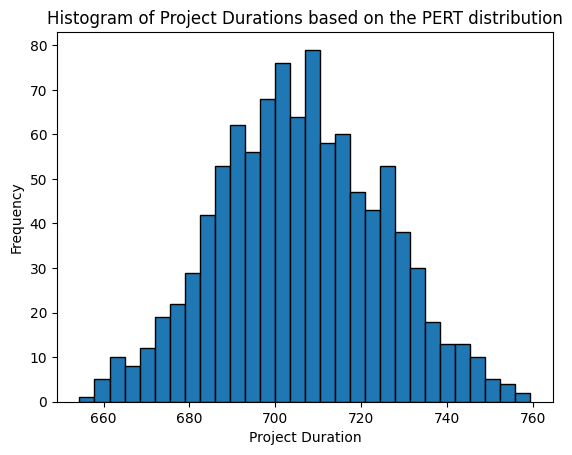

In [32]:
plt.hist(durations, bins=30, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Project Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Project Durations based on the PERT distribution')
plt.savefig('histogram.png')
plt.show()

Calculate the probability that the project will be finished under a certain deadline

In [33]:
deadline = 730

#ecdf
ecdf = np.cumsum(np.sort(durations)) / len(durations)

# Evaluate the ECDF for a specific value
probability = np.searchsorted(np.sort(durations), deadline, side='right') / len(durations)
print('There is '+f"{probability*100:.2f}" + '% probability that the project will be finished in '+ str(deadline) + ' days.')

There is 89.00% probability that the project will be finished in 730 days.
